<div class="markdown-google-sans">
  <h2>WAWAN FIRGIAWAN - UNIVERSITAS SULAWESI BARAT</h2>
</div>

***(UJI KOMPETENSI BNSP ASSOCIATE DATA SCIENTIST TAHUN 2025)***

# **Deskripsi Proyek**
Proyek ini dirancang untuk mengoptimalkan analisis penjualan dengan memanfaatkan prediksi total penjualan, *forecasting* tren penjualan masa depan, dan segmentasi pelanggan. Dengan menggabungkan ketiga pendekatan ini, proyek bertujuan memberikan wawasan yang komprehensif untuk mendukung pengambilan keputusan dalam pengembangan bisnis dimasa depan.

# **Tujuan Proyek**
**1. Prediksi Total Penjualan**
*   `Mengembangkan model prediktif untuk memperkirakan total penjualan (Total) berdasarkan atribut lain seperti Jumlah, Harga, Kategori Barang, Ekspedisi, dan lokasi (Provinsi dan Kota).`
*   `Memberikan gambaran potensi pendapatan berdasarkan pola historis, yang membantu dalam mengoptimalkan strategi penjualan.`

**2. Forecasting Tren Penjualan Masa Depan**
*   `Melakukan analisis deret waktu (time series) untuk memprediksi tren penjualan di masa depan.`
*   `Membantu manajemen dalam merencanakan stok, alokasi sumber daya, dan strategi promosi dengan memahami pola musiman dan fluktuasi penjualan.`

**3. Segmentasi Pelanggan**
*   `Mengelompokkan pelanggan berdasarkan pola pembelian, seperti jumlah transaksi, total pengeluaran, dan lokasi geografis.`
*   `Meningkatkan strategi pemasaran dengan memberikan rekomendasi produk yang lebih personal berdasarkan segmen pelanggan.`





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [126]:
%cd /content/drive/MyDrive/Dokumen/Sertifikasi BNSP Data Scientist

/content/drive/MyDrive/Dokumen/Sertifikasi BNSP Data Scientist


In [127]:
# Import Library Pandas
import pandas as pd

# Memuat data dari file
file_path = 'dataset.txt'

In [128]:
# Pembacaan Data dengan Separation menggunakan pemisah ";"
data = pd.read_csv(file_path, sep=';')

# Menampilkan data dalam bentuk tabel
print(data.to_string(index=False)) # Use to_string to display all rows

 No. Invoice Tgl_Invoice  KodePelanggan       Nama Pelanggan              Alamat              Kota  Provinsi    Sales     KanReg  Tgl_Kirim Ekspedisi Kategori Barang Jenis Barang  Jumlah     Harga      Total  TW
         256  05/01/2018             23       Captain Marvel      Jl. Jambu mede         Mojokerto     Jatim    Mawar       Jawa 06/01/2018       JNE         Perabot   Meja Makan       1 2211000.0  2211000.0   1
         905  07/01/2018             68            Captain N  Jl. Jambu semarang          Pasuruan     Jatim     Lily       Jawa 08/01/2018      TNT          Perabot  Kursi Makan       6 3951000.0 23706000.0   1
         492  27/01/2018             76     Captain Universe     Jl. Jeruk besar        Singkawang    Kalbar    Mawar Kalimantan 28/01/2018       POS          Gadget     HP Apple       1 4892000.0  4892000.0   1
         602  06/02/2018             58              Aquaman          Jl. Bacang           Cilegon    Banten  Jasmine       Jawa 07/02/2018       POS   

In [129]:
# Menampilkan lebih ringkas dan bisa di-scroll:
from IPython.display import display, HTML
display(HTML(data.to_html(index=False))) # Menampilkan tabel yang lebih rapi dengan HTML

No. Invoice,Tgl_Invoice,KodePelanggan,Nama Pelanggan,Alamat,Kota,Provinsi,Sales,KanReg,Tgl_Kirim,Ekspedisi,Kategori Barang,Jenis Barang,Jumlah,Harga,Total,TW
256,05/01/2018,23,Captain Marvel,Jl. Jambu mede,Mojokerto,Jatim,Mawar,Jawa,06/01/2018,JNE,Perabot,Meja Makan,1,2211000.0,2211000.0,1
905,07/01/2018,68,Captain N,Jl. Jambu semarang,Pasuruan,Jatim,Lily,Jawa,08/01/2018,TNT,Perabot,Kursi Makan,6,3951000.0,23706000.0,1
492,27/01/2018,76,Captain Universe,Jl. Jeruk besar,Singkawang,Kalbar,Mawar,Kalimantan,28/01/2018,POS,Gadget,HP Apple,1,4892000.0,4892000.0,1
602,06/02/2018,58,Aquaman,Jl. Bacang,Cilegon,Banten,Jasmine,Jawa,07/02/2018,POS,Elektronik,Mesin Cuci,3,4358000.0,13074000.0,1
158,20/02/2018,41,Airboy,Jl. Binjai,Gorontalo,Gorontalo,Melati,Sulawesi,21/02/2018,TNT,Perabot,Kursi Makan,3,3756000.0,11268000.0,1
624,23/02/2018,74,Astro Boy,Jl. Belimbing,Tangerang Selatan,Banten,Melati,Jawa,24/02/2018,TNT,Perabot,Meja Tamu,5,4737000.0,23685000.0,1
224,07/03/2018,52,Comet Man,Jl. Kedondong,Tanjungpinang,Kepri,Melati,Sumatera,Gadget,POS,08/03/2018,Kursi Tamu,8,3139000.0,25112000.0,1
880,11/03/2018,7,Chamber,Jl. Jeruk kingkit,Banjarmasin,Kalsel,Dahlia,Kalimantan,Perabot,TNT,12/03/2018,HP LG,2,3989000.0,7978000.0,1
588,15/03/2018,23,Captain Video,Jl. Jeruk keprok,Banjarbaru,Kalsel,Melati,Kalimantan,16/03/2018,JNE,Gadget,HP Oppo,4,4032000.0,16128000.0,1
513,15/03/2018,6,Deathlok,Jl. Lai,Makassar,Sulsel,Lily,Sulawesi,16/03/2018,TNT,Perabot,Meja Tamu,8,2627000.0,21016000.0,1


In [130]:
# Menampilkan semua atribut (kolom) dalam dataset
print("Atribut data dalam dataset:")
print(data.columns)

Atribut data dalam dataset:
Index(['No. Invoice', 'Tgl_Invoice', 'KodePelanggan', 'Nama Pelanggan',
       'Alamat', 'Kota', 'Provinsi', 'Sales', 'KanReg', 'Tgl_Kirim',
       'Ekspedisi', 'Kategori Barang', 'Jenis Barang', 'Jumlah', 'Harga',
       'Total', 'TW'],
      dtype='object')


In [131]:
# Menampilkan informasi detail atribut
print("Detail atribut data:")
print(data.info())

Detail atribut data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No. Invoice      77 non-null     int64  
 1   Tgl_Invoice      77 non-null     object 
 2   KodePelanggan    77 non-null     int64  
 3   Nama Pelanggan   77 non-null     object 
 4   Alamat           77 non-null     object 
 5   Kota             77 non-null     object 
 6   Provinsi         77 non-null     object 
 7   Sales            74 non-null     object 
 8   KanReg           77 non-null     object 
 9   Tgl_Kirim        77 non-null     object 
 10  Ekspedisi        77 non-null     object 
 11  Kategori Barang  75 non-null     object 
 12  Jenis Barang     77 non-null     object 
 13  Jumlah           77 non-null     int64  
 14  Harga            73 non-null     float64
 15  Total            73 non-null     float64
 16  TW               77 non-null     int64  
dt

In [132]:
# Assessing Data: Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data.
# Cek Missing Value pada dataset
data.isnull().sum() # Mengecek adanya nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai NaN dalam library pandas.

,0
No. Invoice,0
Tgl_Invoice,0
KodePelanggan,0
Nama Pelanggan,0
Alamat,0
Kota,0
Provinsi,0
Sales,3
KanReg,0
Tgl_Kirim,0


In [133]:
# Menampilkan jumlah missing values di setiap kolom
missing_values = data.isnull().sum()

# Menampilkan total nilai kosong dan persentase
missing_percentage = (missing_values / len(data)) * 100

# Gabungkan dalam satu tabel untuk kemudahan analisis
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Tampilkan hasil
print("Ringkasan Missing Values:")
print(missing_data_summary)

Ringkasan Missing Values:
                 Missing Values  Percentage (%)
No. Invoice                   0        0.000000
Tgl_Invoice                   0        0.000000
KodePelanggan                 0        0.000000
Nama Pelanggan                0        0.000000
Alamat                        0        0.000000
Kota                          0        0.000000
Provinsi                      0        0.000000
Sales                         3        3.896104
KanReg                        0        0.000000
Tgl_Kirim                     0        0.000000
Ekspedisi                     0        0.000000
Kategori Barang               2        2.597403
Jenis Barang                  0        0.000000
Jumlah                        0        0.000000
Harga                         4        5.194805
Total                         4        5.194805
TW                            0        0.000000


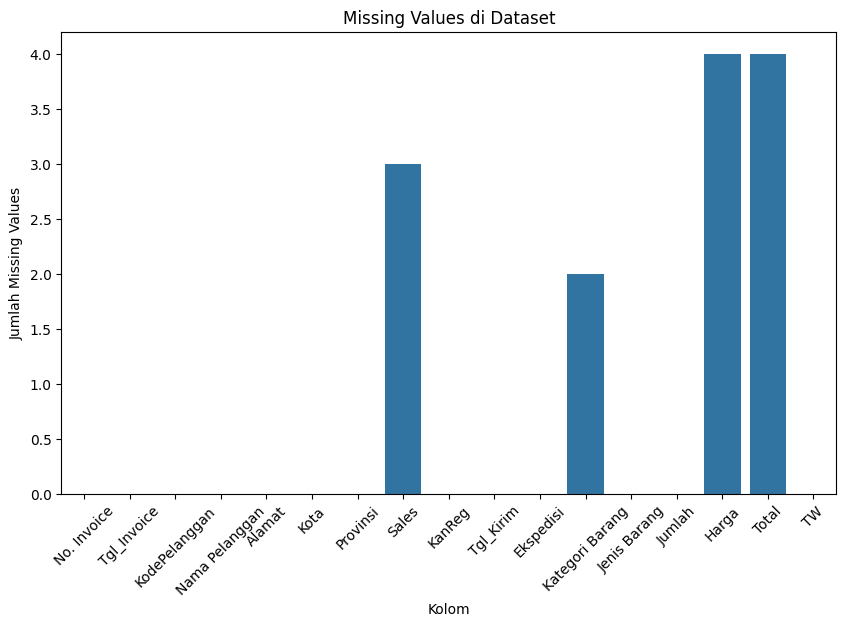

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot jumlah missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_summary.index, y=missing_data_summary['Missing Values'])
plt.title("Missing Values di Dataset")
plt.xlabel("Kolom")
plt.ylabel("Jumlah Missing Values")
plt.xticks(rotation=45)
plt.show()

In [135]:
# Menghapus baris yang memiliki NaN (tidak terdefenisi) pada kolom 'Sales', 'Kategori Barang', 'Harga', dan 'Total'
data_cleaned = data.dropna(subset=['Sales', 'Kategori Barang', 'Harga', 'Total'])

# Menampilkan hasil setelah penghapusan
print(f"Jumlah data sebelum penghapusan: {len(data)}")
print(f"Jumlah data setelah penghapusan: {len(data_cleaned)}")

Jumlah data sebelum penghapusan: 77
Jumlah data setelah penghapusan: 68


In [136]:
# Pengecekan kembali Missing Value pada dataset
data_cleaned.isnull().sum()

,0
No. Invoice,0
Tgl_Invoice,0
KodePelanggan,0
Nama Pelanggan,0
Alamat,0
Kota,0
Provinsi,0
Sales,0
KanReg,0
Tgl_Kirim,0


In [137]:
display(HTML(data_cleaned.to_html(index=False))) # Menampilkan tabel yang lebih rapi dengan HTML

No. Invoice,Tgl_Invoice,KodePelanggan,Nama Pelanggan,Alamat,Kota,Provinsi,Sales,KanReg,Tgl_Kirim,Ekspedisi,Kategori Barang,Jenis Barang,Jumlah,Harga,Total,TW
256,05/01/2018,23,Captain Marvel,Jl. Jambu mede,Mojokerto,Jatim,Mawar,Jawa,06/01/2018,JNE,Perabot,Meja Makan,1,2211000.0,2211000.0,1
905,07/01/2018,68,Captain N,Jl. Jambu semarang,Pasuruan,Jatim,Lily,Jawa,08/01/2018,TNT,Perabot,Kursi Makan,6,3951000.0,23706000.0,1
492,27/01/2018,76,Captain Universe,Jl. Jeruk besar,Singkawang,Kalbar,Mawar,Kalimantan,28/01/2018,POS,Gadget,HP Apple,1,4892000.0,4892000.0,1
602,06/02/2018,58,Aquaman,Jl. Bacang,Cilegon,Banten,Jasmine,Jawa,07/02/2018,POS,Elektronik,Mesin Cuci,3,4358000.0,13074000.0,1
158,20/02/2018,41,Airboy,Jl. Binjai,Gorontalo,Gorontalo,Melati,Sulawesi,21/02/2018,TNT,Perabot,Kursi Makan,3,3756000.0,11268000.0,1
624,23/02/2018,74,Astro Boy,Jl. Belimbing,Tangerang Selatan,Banten,Melati,Jawa,24/02/2018,TNT,Perabot,Meja Tamu,5,4737000.0,23685000.0,1
224,07/03/2018,52,Comet Man,Jl. Kedondong,Tanjungpinang,Kepri,Melati,Sumatera,Gadget,POS,08/03/2018,Kursi Tamu,8,3139000.0,25112000.0,1
880,11/03/2018,7,Chamber,Jl. Jeruk kingkit,Banjarmasin,Kalsel,Dahlia,Kalimantan,Perabot,TNT,12/03/2018,HP LG,2,3989000.0,7978000.0,1
588,15/03/2018,23,Captain Video,Jl. Jeruk keprok,Banjarbaru,Kalsel,Melati,Kalimantan,16/03/2018,JNE,Gadget,HP Oppo,4,4032000.0,16128000.0,1
513,15/03/2018,6,Deathlok,Jl. Lai,Makassar,Sulsel,Lily,Sulawesi,16/03/2018,TNT,Perabot,Meja Tamu,8,2627000.0,21016000.0,1


In [138]:
# Cek Unique pada dataset

# Checking unique values
unique_values = {column: data_cleaned[column].unique() for column in data_cleaned.columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Column '{column}':")
    print(values)
    print("\n")

Column 'No. Invoice':
[256 905 492 602 158 624 224 880 588 513 127 520 194 475 611 661 317 267
 760 271 995 371 787 925 686 213 386 620 888 252 419 933 867 283 550 987
 236 909 389 493 275 843 979 136 294 777 704 427 316 100 790 728 929 149
 265 918 702 399 525 839 745 200 255 749 437]


Column 'Tgl_Invoice':
['05/01/2018' '07/01/2018' '27/01/2018' '06/02/2018' '20/02/2018'
 '23/02/2018' '07/03/2018' '11/03/2018' '15/03/2018' '27/03/2018'
 '28/03/2018' '11/04/2018' '22/04/2018' '18/05/2018' '22/05/2018'
 '25/05/2018' '04/06/2018' '11/06/2018' '18/06/2018' '25/06/2018'
 '04/07/2018' '05/07/2018' '15/07/2018' '19/07/2018' '09/08/2018'
 '16/08/2018' '20/08/2018' '21/08/2018' '26/08/2018' '07/09/2018'
 '11/09/2018' '13/09/2018' '20/09/2018' '21/09/2018' '22/09/2018'
 '24/09/2018' '25/09/2018' '27/09/2018' '28/09/2018' '01/10/2018'
 '03/10/2018' '08/10/2018' '09/10/2018' '11/10/2018' '13/10/2018'
 '19/10/2018' '20/10/2018' '21/10/2018' '02/11/2018' '04/11/2018'
 '14/11/2018' '20/11/2018' '0

In [139]:
# melihat lebih banyak parameter statistik serta menyertakan kolom non-numerik pada dataset
data_cleaned.describe(include="all")

,No. Invoice,Tgl_Invoice,KodePelanggan,Nama Pelanggan,Alamat,Kota,Provinsi,Sales,KanReg,Tgl_Kirim,Ekspedisi,Kategori Barang,Jenis Barang,Jumlah,Harga,Total,TW
count,68.000000,68,68.000000,68,68,68,68,68,68,68,68,68,68,68.000000,6.800000e+01,6.800000e+01,68.000000
unique,NaN,63,NaN,47,68,58,21,8,6,63,3,5,15,NaN,NaN,NaN,NaN
top,NaN,27/03/2018,NaN,Angel,Jl. Jambu mede,Makassar,Sulsel,Lily,Jawa,28/03/2018,TNT,Gadget,HP Samsung,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,6,1,11,12,20,31,2,24,25,6,NaN,NaN,NaN,NaN
mean,546.617647,NaN,46.558824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.735294,3.660779e+06,1.713841e+07,2.838235
std,273.852288,NaN,24.080327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.746056,9.255382e+05,1.059822e+07,1.127807
min,100.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000e+06,2.211000e+06,1.000000
25%,281.000000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750000,2.926250e+06,8.732250e+06,2.000000
50%,522.500000,NaN,46.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.730500e+06,1.608400e+07,3.000000
75%,787.750000,NaN,69.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.250000,4.438250e+06,2.452875e+07,4.000000


array([[<Axes: title={'center': 'No. Invoice'}>,
        <Axes: title={'center': 'KodePelanggan'}>],
       [<Axes: title={'center': 'Jumlah'}>,
        <Axes: title={'center': 'Harga'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'TW'}>]], dtype=object)

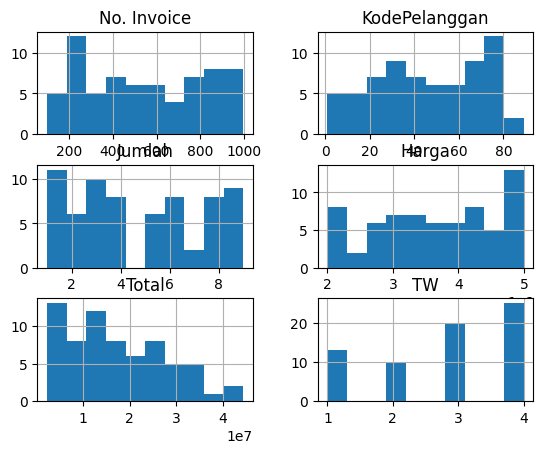

In [140]:
# Membuat plot histogram dari kolom numerik pada sebuah DataFrame
data_cleaned.hist()

# **Exploratory Data Analysis (EDA)**

In [141]:
# Tampilkan kembali dataset Fix
data_cleaned.head()

,No. Invoice,Tgl_Invoice,KodePelanggan,Nama Pelanggan,Alamat,Kota,Provinsi,Sales,KanReg,Tgl_Kirim,Ekspedisi,Kategori Barang,Jenis Barang,Jumlah,Harga,Total,TW
0,256,05/01/2018,23,Captain Marvel,Jl. Jambu mede,Mojokerto,Jatim,Mawar,Jawa,06/01/2018,JNE,Perabot,Meja Makan,1,2211000.0,2211000.0,1
1,905,07/01/2018,68,Captain N,Jl. Jambu semarang,Pasuruan,Jatim,Lily,Jawa,08/01/2018,TNT,Perabot,Kursi Makan,6,3951000.0,23706000.0,1
2,492,27/01/2018,76,Captain Universe,Jl. Jeruk besar,Singkawang,Kalbar,Mawar,Kalimantan,28/01/2018,POS,Gadget,HP Apple,1,4892000.0,4892000.0,1
3,602,06/02/2018,58,Aquaman,Jl. Bacang,Cilegon,Banten,Jasmine,Jawa,07/02/2018,POS,Elektronik,Mesin Cuci,3,4358000.0,13074000.0,1
4,158,20/02/2018,41,Airboy,Jl. Binjai,Gorontalo,Gorontalo,Melati,Sulawesi,21/02/2018,TNT,Perabot,Kursi Makan,3,3756000.0,11268000.0,1


### **Penjelasan Atribut Data**
1. **`No. Invoice`**  
   - **Deskripsi**: Nomor unik untuk setiap transaksi atau penjualan.  
   - **Fungsi**: Sebagai identifikasi transaksi.

2. **`Tgl_Invoice`**  
   - **Deskripsi**: Tanggal faktur (invoice) dibuat.  
   - **Fungsi**: Menandai kapan transaksi terjadi, penting untuk analisis waktu.

3. **`KodePelanggan`**  
   - **Deskripsi**: Kode unik yang diberikan untuk setiap pelanggan.  
   - **Fungsi**: Digunakan untuk melacak pelanggan tertentu dalam dataset.

4. **`Nama Pelanggan`**  
   - **Deskripsi**: Nama pelanggan yang melakukan transaksi.  
   - **Fungsi**: Memberikan informasi identitas pelanggan.

5. **`Alamat`**  
   - **Deskripsi**: Alamat lengkap pelanggan.  
   - **Fungsi**: Berguna untuk analisis geografis atau pengiriman barang.

6. **`Kota`**  
   - **Deskripsi**: Kota tempat pelanggan berada.  
   - **Fungsi**: Membantu dalam analisis geografis berdasarkan kota.

7. **`Provinsi`**  
   - **Deskripsi**: Provinsi tempat pelanggan berada.  
   - **Fungsi**: Digunakan untuk analisis geografis yang lebih luas.

8. **`Sales`**  
   - **Deskripsi**: Nama atau kode sales yang bertanggung jawab atas transaksi.  
   - **Fungsi**: Melacak performa tim penjualan.

9. **`KanReg`**  
   - **Deskripsi**: Regional atau wilayah pemasaran penjualan.  
   - **Fungsi**: Digunakan untuk analisis berdasarkan wilayah kerja sales.

10. **`Tgl_Kirim`**  
    - **Deskripsi**: Tanggal barang dikirimkan ke pelanggan.  
    - **Fungsi**: Membantu dalam mengukur waktu pengiriman (lead time).

11. **`Ekspedisi`**  
    - **Deskripsi**: Nama layanan ekspedisi yang digunakan untuk pengiriman barang.  
    - **Fungsi**: Berguna untuk analisis performa ekspedisi atau metode pengiriman.

12. **`Kategori Barang`**  
    - **Deskripsi**: Kategori barang yang dijual, seperti **Perabot**, **Elektronik**, atau **Gadget**.  
    - **Fungsi**: Mengelompokkan produk berdasarkan jenisnya.

13. **`Jenis Barang`**  
    - **Deskripsi**: Jenis barang spesifik dalam kategori, seperti **Meja Makan**, **AC**, atau **HP Samsung**.  
    - **Fungsi**: Informasi lebih rinci tentang produk yang dijual.

14. **`Jumlah`**  
    - **Deskripsi**: Jumlah unit barang yang dibeli dalam transaksi tersebut.  
    - **Fungsi**: Digunakan untuk menghitung total penjualan.

15. **`Harga`**  
    - **Deskripsi**: Harga satuan barang.  
    - **Fungsi**: Komponen penting dalam menghitung nilai transaksi.

16. **`Total`**  
    - **Deskripsi**: Total nilai transaksi, dihitung sebagai `Jumlah × Harga`.  
    - **Fungsi**: Indikator nilai penjualan untuk setiap transaksi.

17. **`TW`**  
    - **Deskripsi**: Triwulan (quarter) transaksi berlangsung, seperti 1 (Jan-Mar), 2 (Apr-Jun), dst.  
    - **Fungsi**: Berguna untuk analisis berdasarkan periode waktu triwulan.

---

### **Kesimpulan**
Dataset ini sangat kaya dengan informasi yang berguna untuk:
- **Analisis waktu**: Menggunakan `Tgl_Invoice`, `Tgl_Kirim`, dan `TW`.
- **Analisis geografis**: Menggunakan `Kota` dan `Provinsi`.
- **Analisis produk**: Menggunakan `Kategori Barang` dan `Jenis Barang`.
- **Analisis penjualan**: Menggunakan `Jumlah`, `Harga`, dan `Total`.

<Figure size 1000x600 with 0 Axes>

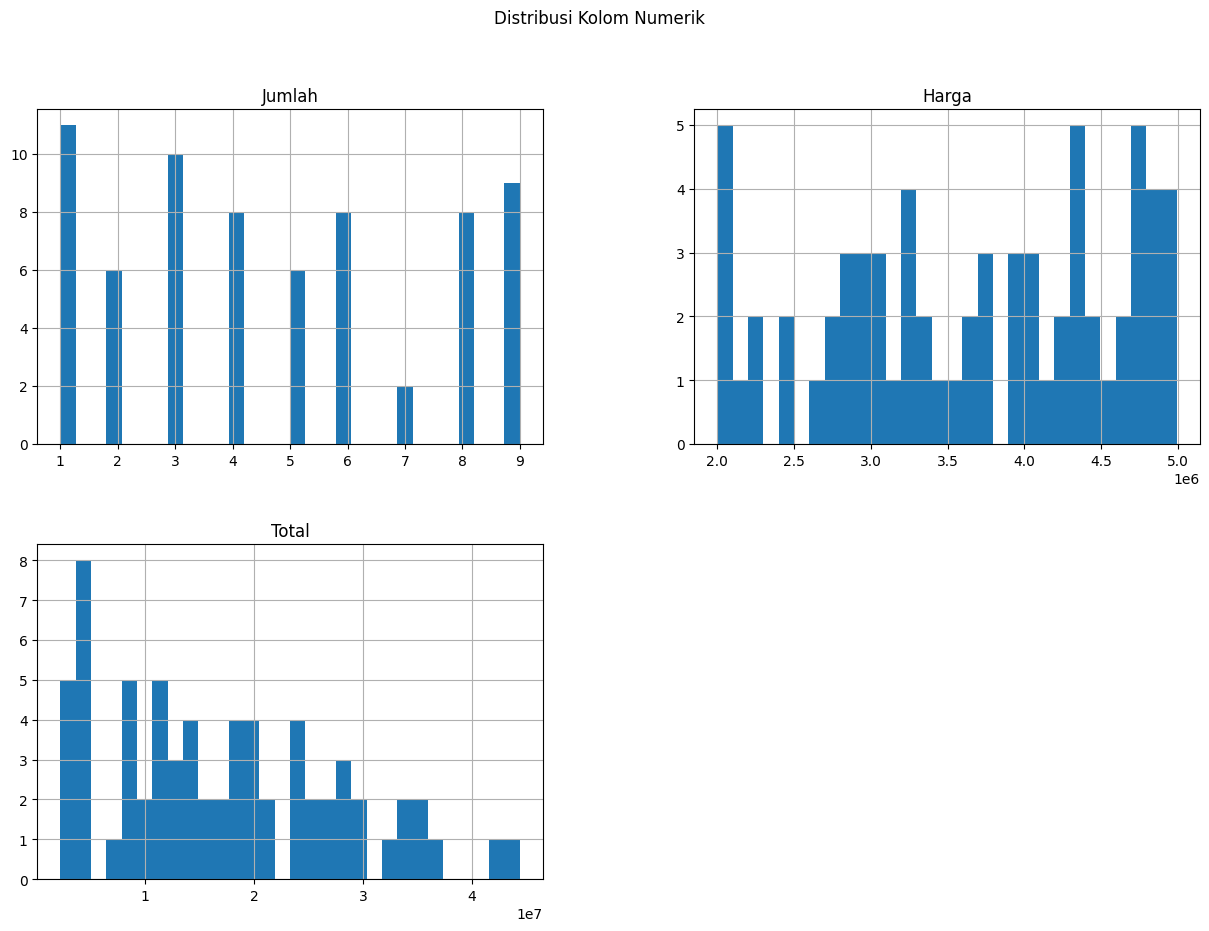

In [142]:
# Visualisasi distribusi kolom numerik
plt.figure(figsize=(10, 6))
data_cleaned[['Jumlah', 'Harga', 'Total']].hist(bins=30, figsize=(15, 10), layout=(2, 2))
plt.suptitle("Distribusi Kolom Numerik")
plt.show()

### Grafik diatas menunjukkan distribusi data pada kolom Jumlah dan Total:
**1. Jumlah**
> Dimana dari hasil diatas diketahui bahwa Jumlah barang yang dibeli oleh pelanggan cenderung tersebar merata pada rentang 1 hingga 9. Pembelian barang dengan jumlah 1 lebih sering terjadi dibandingkan pembelian dengan jumlah lainnya. Sehingga Ada kecenderungan pelanggan lebih sering membeli dalam jumlah kecil.`

**2. Total**
> Sedangkan pada Grafik Total menunjukkan bahwa Sebagian besar nilai penjualan (Total) berada di kisaran angka kecil hingga sedang. Penjualan dengan total transaksi besar (di atas 3 juta atau 4 juta) jarang terjadi. Distribusi ini terlihat tidak merata, dengan penjualan kecil jauh lebih banyak.





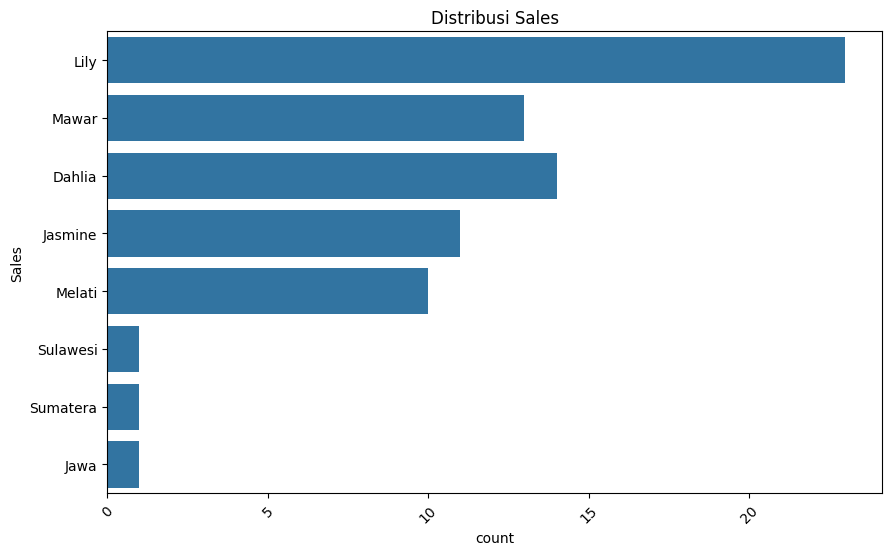

In [143]:
# Distribusi kolom kategorikal
kategori = ['Sales']
for col in kategori:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], order=data_cleaned[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

Grafik ini menunjukkan Distribusi Sales dalam dataset Anda, yang menggambarkan jumlah transaksi yang dilakukan oleh masing-masing sales. Grafik diatas Menampilkan nama-nama sales atau tim yang bertanggung jawab atas transaksi dan juga Menunjukkan jumlah transaksi yang ditangani oleh masing-masing sales.

Namun **Lily** adalah sales dengan jumlah transaksi paling banyak dibandingkan yang lain, menunjukkan performa yang sangat tinggi.
Sales seperti **Dahlia, Mawar, dan Jasmine** juga memiliki kontribusi yang signifikan terhadap total transaksi.

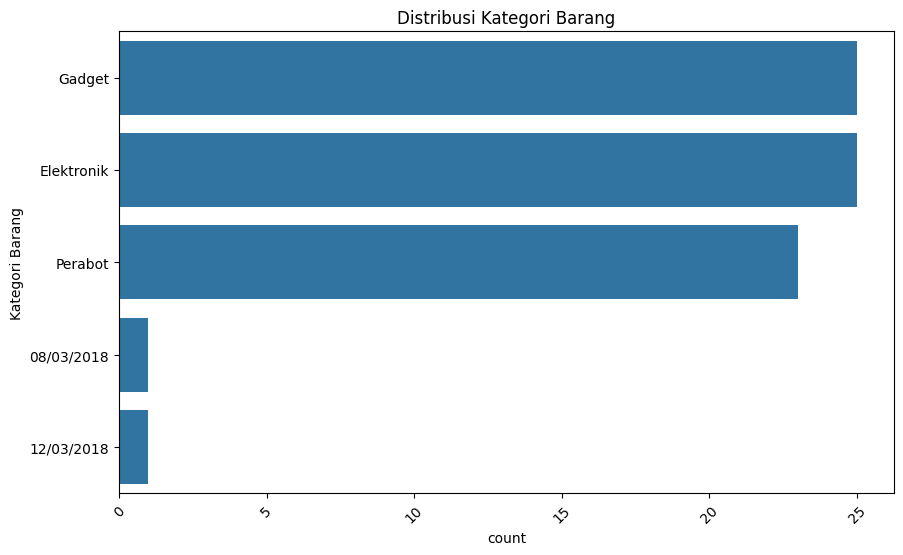

In [144]:
# Distribusi kolom kategorikal
kategori = ['Kategori Barang']
for col in kategori:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], order=data_cleaned[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

In [145]:
# Menghapus nilai salah di kolom 'Kategori Barang'
data_cleaned = data_cleaned[~data_cleaned['Kategori Barang'].isin(['08/03/2018', '12/03/2018'])]

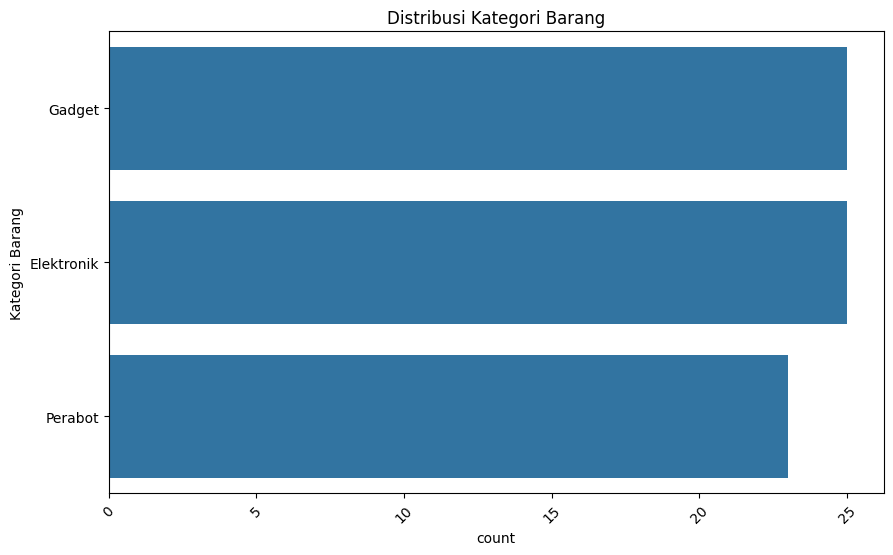

In [146]:
# Distribusi kolom kategorikal
kategori = ['Kategori Barang']
for col in kategori:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], order=data_cleaned[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

##### Grafik diatas menunjukkan **Distribusi Kategori Barang** dalam dataset Anda. Berikut adalah penjelasan dari elemen-elemen yang ditampilkan:
- **Gadget**  
- **Elektronik**  
- **Perabot**

Hal ini Menunjukkan jumlah atau frekuensi transaksi untuk setiap kategori barang, dimana **Gadget** dan **Elektronik** memiliki jumlah transaksi yang hampir sama, menunjukkan bahwa keduanya adalah kategori barang yang paling populer dalam dataset dan **Perabot** memiliki jumlah transaksi yang sedikit lebih rendah dibandingkan dua kategori sebelumnya, tetapi tetap signifikan.

##### **Anomali pada Data**
Terdapat dua nilai tambahan pada sumbu vertikal (`08/03/2018` dan `12/03/2018`) yang seharusnya tidak termasuk sebagai kategori barang. Kemungkinan ini adalah data tanggal yang salah masuk ke kolom `Kategori Barang` sehingga dilakukan pembersihan data untuk menghapus nilai yang salah sebelumnya.

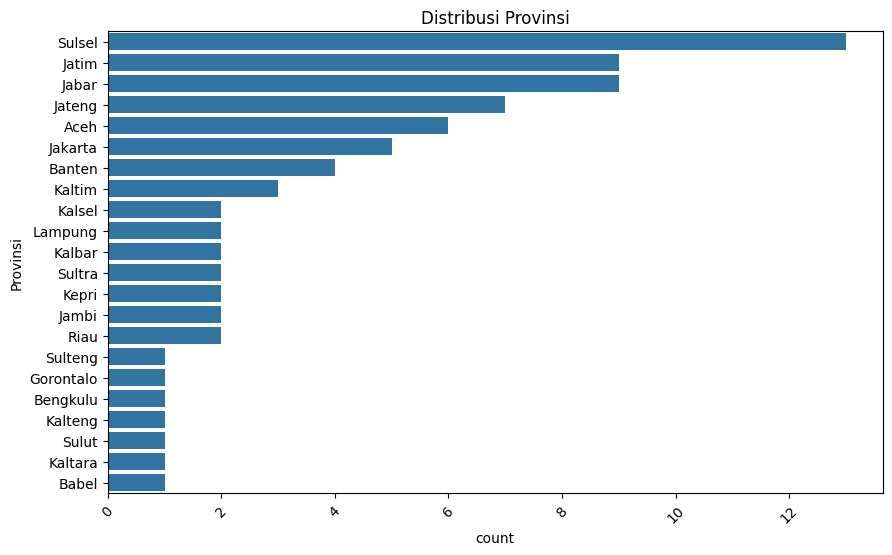

In [147]:
# Distribusi kolom kategorikal
kategori = ['Provinsi']
for col in kategori:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

**Gambar diatas** Menampilkan nama-nama provinsi tempat transaksi atau data penjualan terjadi. Sumbu Horizontal* (Count)* Menunjukkan jumlah transaksi atau data yang dicatat dari masing-masing provinsi. Dari data diatas diketahui bahwa:

**1. Provinsi dengan Transaksi Terbanyak**
> Sulsel (Sulawesi Selatan) mencatat jumlah transaksi terbanyak dibandingkan provinsi lainnya. Provinsi seperti Jatim (Jawa Timur), Jabar (Jawa Barat), dan Jateng (Jawa Tengah) juga memiliki jumlah transaksi yang signifikan.

**2. Provinsi dengan Transaksi Terendah**
> Provinsi seperti Babel (Bangka Belitung), Kaltara (Kalimantan Utara), dan Sulut (Sulawesi Utara) memiliki jumlah transaksi yang relatif sedikit.

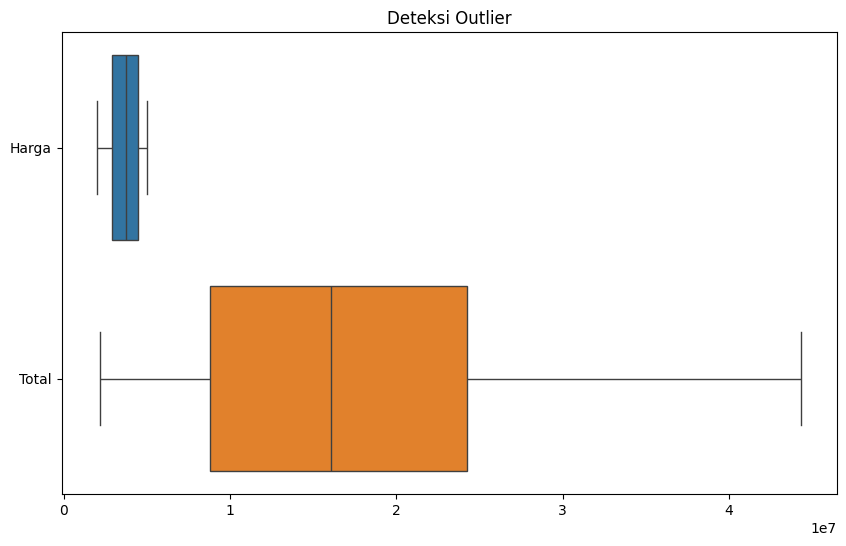

In [148]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data_cleaned[['Harga', 'Total']], orient="h")
plt.title("Deteksi Outlier")
plt.show()

Boxplot diatas menunjukkan bahwa nilai Total dalam dataset Anda berada dalam rentang normal, tanpa nilai yang terlalu ekstrem di luar whisker. Hal ini ditunjukkan dimana Total penjualan pada data memiliki distribusi yang cukup merata tanpa adanya nilai yang ekstrem *(outlier)*.

# **Kesimpulan**
Dari hasil analisis pada Dataset, diketahui bahwa data ini sangat kaya dengan informasi yang berguna untuk:

- **Analisis waktu:** Menggunakan `Tgl_Invoice`, `Tgl_Kirim`, dan `TW`.
- **Analisis geografis:** Menggunakan `Kota` dan `Provinsi`.
- **Analisis produk:** Menggunakan `Kategori Barang` dan `Jenis Barang`.
- **Analisis penjualan:** Menggunakan `Jumlah`, `Harga`, dan `Total`.

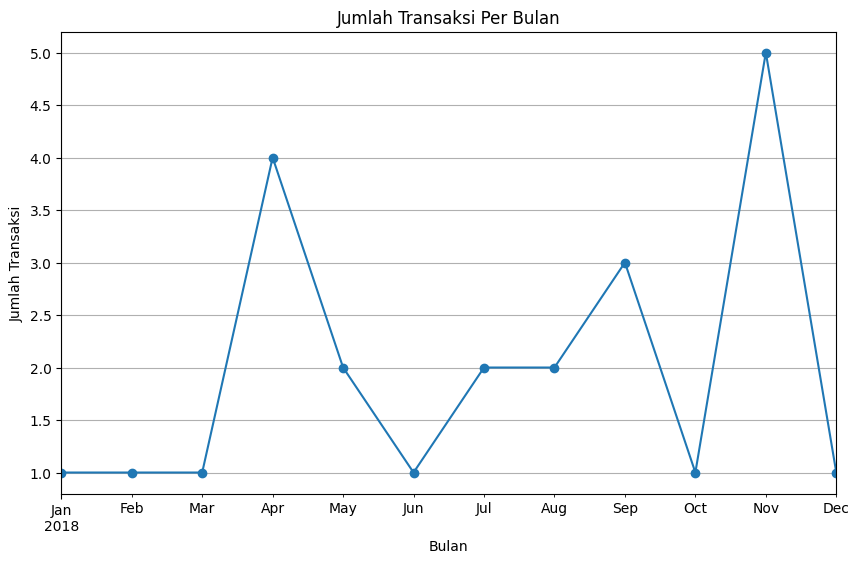

Statistik waktu pengiriman:
count    21.000000
mean     30.285714
std       0.717137
min      28.000000
25%      30.000000
50%      30.000000
75%      31.000000
max      31.000000
Name: Waktu_Pengiriman, dtype: float64


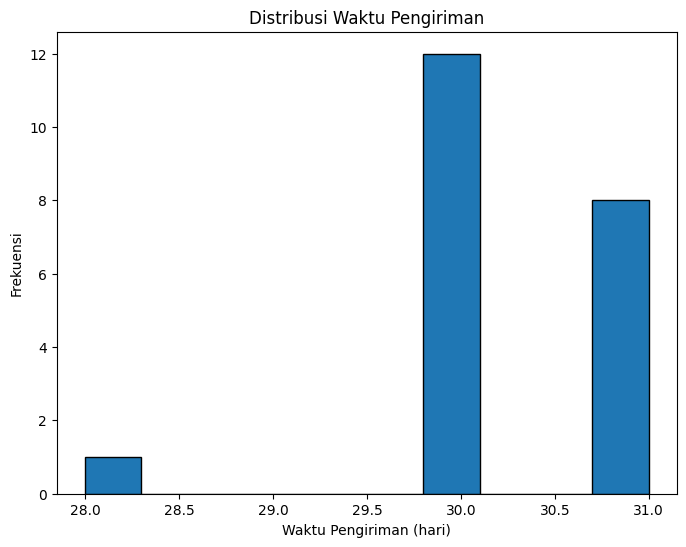

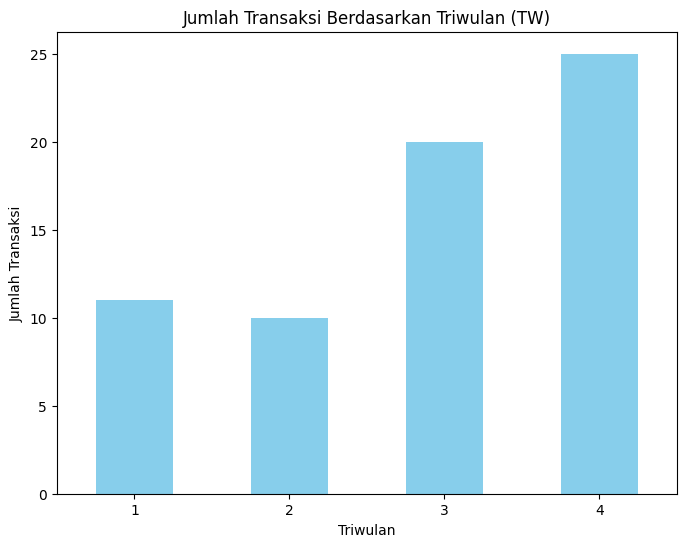

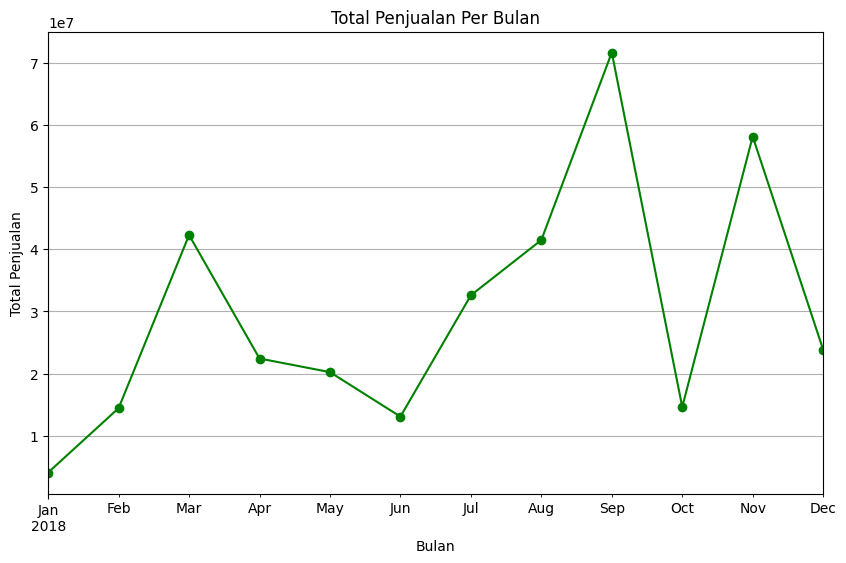

In [149]:
# Analisis waktu
import pandas as pd
import matplotlib.pyplot as plt

# Menggunakan dataset yang disimpan di data_cleaned
data = data_cleaned

# Konversi kolom tanggal ke format datetime
data['Tgl_Invoice'] = pd.to_datetime(data['Tgl_Invoice'], errors='coerce')
data['Tgl_Kirim'] = pd.to_datetime(data['Tgl_Kirim'], errors='coerce')

# ===========================================================
# Analisis 1: Jumlah Transaksi Per Bulan
# ===========================================================
transaksi_per_bulan = data.groupby(data['Tgl_Invoice'].dt.to_period('M')).size()

# Visualisasi tren transaksi per bulan
plt.figure(figsize=(10, 6))
transaksi_per_bulan.plot(kind='line', marker='o')
plt.title("Jumlah Transaksi Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.grid()
plt.show()

# ===========================================================
# Analisis 2: Waktu Pengiriman
# ===========================================================
# Hitung selisih hari antara Tgl_Invoice dan Tgl_Kirim
data['Waktu_Pengiriman'] = (data['Tgl_Kirim'] - data['Tgl_Invoice']).dt.days

# Statistik deskriptif waktu pengiriman
print("Statistik waktu pengiriman:")
print(data['Waktu_Pengiriman'].describe())

# Visualisasi distribusi waktu pengiriman
plt.figure(figsize=(8, 6))
data['Waktu_Pengiriman'].plot(kind='hist', bins=10, edgecolor='black')
plt.title("Distribusi Waktu Pengiriman")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Frekuensi")
plt.show()

# ===========================================================
# Analisis 3: Transaksi Berdasarkan Triwulan (TW)
# ===========================================================
transaksi_per_tw = data.groupby('TW').size()

# Visualisasi jumlah transaksi berdasarkan TW
plt.figure(figsize=(8, 6))
transaksi_per_tw.plot(kind='bar', color='skyblue')
plt.title("Jumlah Transaksi Berdasarkan Triwulan (TW)")
plt.xlabel("Triwulan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=0)
plt.show()

# ===========================================================
# Analisis 4: Total Penjualan per Bulan
# ===========================================================
penjualan_per_bulan = data.groupby(data['Tgl_Invoice'].dt.to_period('M'))['Total'].sum()

# Visualisasi tren total penjualan per bulan
plt.figure(figsize=(10, 6))
penjualan_per_bulan.plot(kind='line', marker='o', color='green')
plt.title("Total Penjualan Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.grid()
plt.show()


<ipython-input-150-d7b1c56d97b1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=transaksi_per_provinsi.index, x=transaksi_per_provinsi.values, palette='viridis')


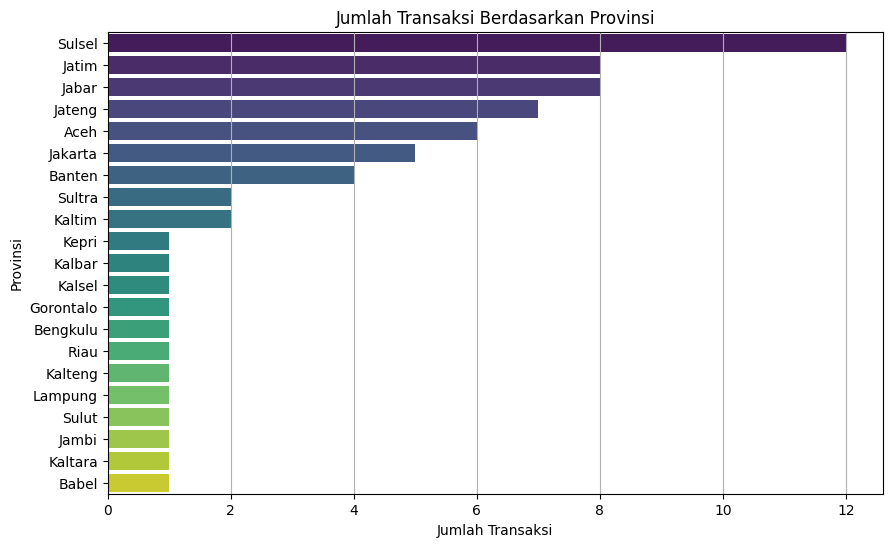

<ipython-input-150-d7b1c56d97b1>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=transaksi_per_kota.index, x=transaksi_per_kota.values, palette='plasma')


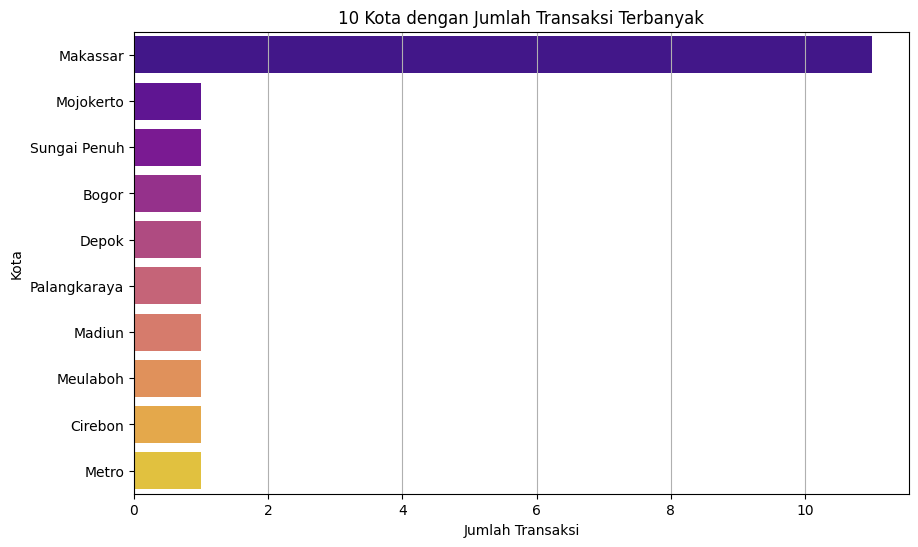

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan dataset yang telah disimpan di data_cleaned
data = data_cleaned

# ===========================================================
# Analisis Geografis: Menggunakan Kota dan Provinsi
# ===========================================================
# Jumlah transaksi berdasarkan Provinsi
transaksi_per_provinsi = data['Provinsi'].value_counts()

# Visualisasi transaksi berdasarkan Provinsi
plt.figure(figsize=(10, 6))
sns.barplot(y=transaksi_per_provinsi.index, x=transaksi_per_provinsi.values, palette='viridis')
plt.title("Jumlah Transaksi Berdasarkan Provinsi")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Provinsi")
plt.grid(axis='x')
plt.show()

# Jumlah transaksi berdasarkan Kota
transaksi_per_kota = data['Kota'].value_counts().head(10)  # Tampilkan 10 Kota Teratas

# Visualisasi transaksi berdasarkan Kota
plt.figure(figsize=(10, 6))
sns.barplot(y=transaksi_per_kota.index, x=transaksi_per_kota.values, palette='plasma')
plt.title("10 Kota dengan Jumlah Transaksi Terbanyak")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kota")
plt.grid(axis='x')
plt.show()

<ipython-input-151-7abf9f128b2b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=transaksi_per_kategori.index, x=transaksi_per_kategori.values, palette='coolwarm')


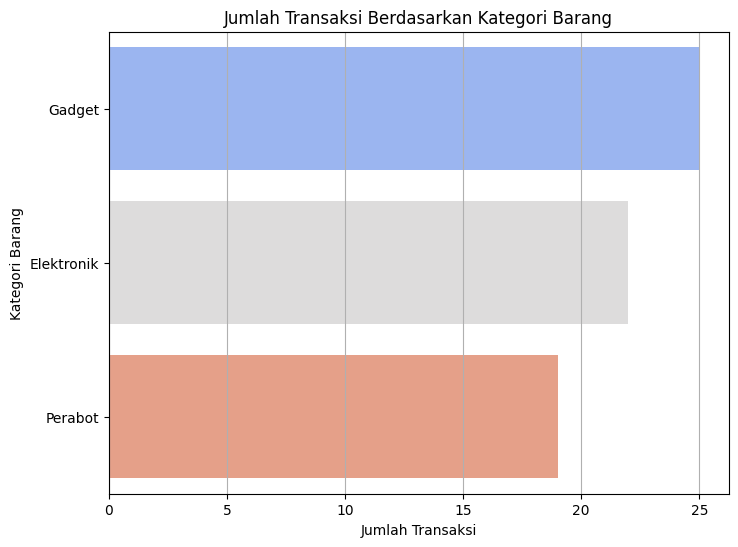

<ipython-input-151-7abf9f128b2b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=transaksi_per_jenis.index, x=transaksi_per_jenis.values, palette='mako')


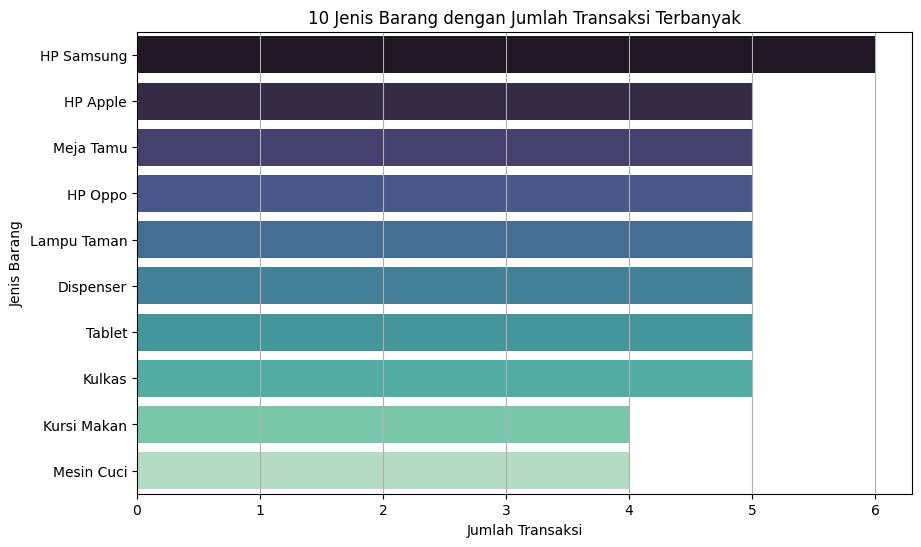

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan dataset yang telah disimpan di data_cleaned
data = data_cleaned

# ===========================================================
# Analisis Produk: Menggunakan Kategori Barang dan Jenis Barang
# ===========================================================
# Jumlah transaksi berdasarkan Kategori Barang
transaksi_per_kategori = data['Kategori Barang'].value_counts()

# Visualisasi transaksi berdasarkan Kategori Barang
plt.figure(figsize=(8, 6))
sns.barplot(y=transaksi_per_kategori.index, x=transaksi_per_kategori.values, palette='coolwarm')
plt.title("Jumlah Transaksi Berdasarkan Kategori Barang")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kategori Barang")
plt.grid(axis='x')
plt.show()

# Jumlah transaksi berdasarkan Jenis Barang
transaksi_per_jenis = data['Jenis Barang'].value_counts().head(10)  # Tampilkan 10 Jenis Barang Teratas

# Visualisasi transaksi berdasarkan Jenis Barang
plt.figure(figsize=(10, 6))
sns.barplot(y=transaksi_per_jenis.index, x=transaksi_per_jenis.values, palette='mako')
plt.title("10 Jenis Barang dengan Jumlah Transaksi Terbanyak")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Jenis Barang")
plt.grid(axis='x')
plt.show()

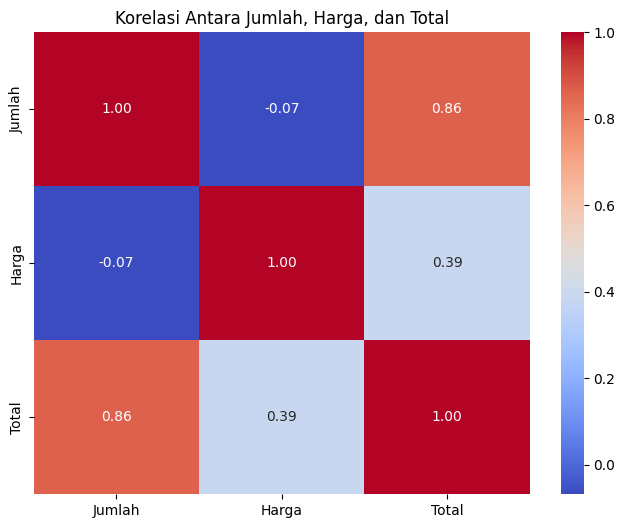

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan dataset yang telah disimpan di data_cleaned
data = data_cleaned

# ===========================================================
# Analisis Korelasi antara Jumlah, Harga, dan Total
# ===========================================================
correlation = data[['Jumlah', 'Harga', 'Total']].corr()

# Visualisasi Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antara Jumlah, Harga, dan Total")
plt.show()

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Memilih fitur (X) dan target (y)
X = data_cleaned[['Jumlah', 'Harga']]  # Fitur
y = data_cleaned['Total']  # Target

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 52
Jumlah data testing: 14


In [154]:
# Langkah 2: Membuat Model Linear Regression
# Membuat model Linear Regression
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept model
print("Koefisien Model:", model.coef_)
print("Intercept Model:", model.intercept_)

Koefisien Model: [3.57141408e+06 4.87745368e+00]
Intercept Model: -17734141.229544584


In [155]:
# Langkah 3: Evaluasi Model
# Prediksi data testing
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 2464863.26181447
Mean Squared Error (MSE): 10218546430779.822
Root Mean Squared Error (RMSE): 3196646.122231834
R-squared (R2): 0.9330346843480101


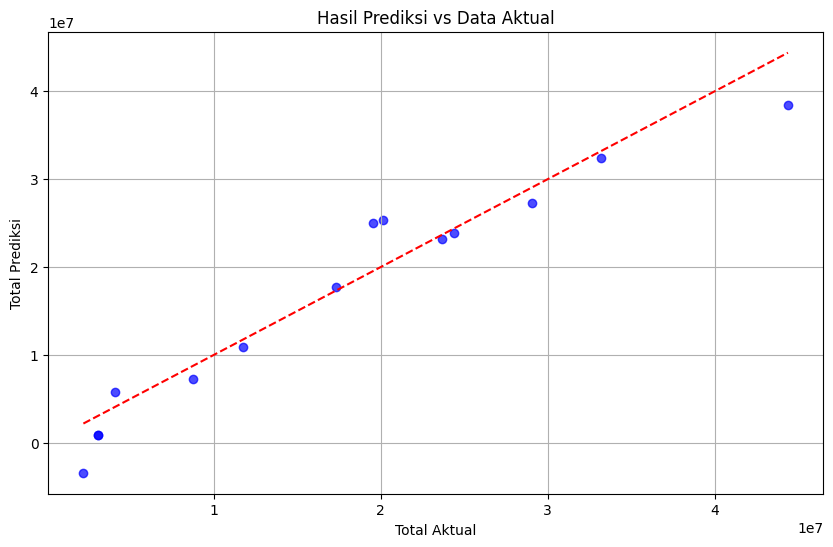

In [156]:
# Langkah 4: Visualisasi Hasil Prediksi
import matplotlib.pyplot as plt

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title("Hasil Prediksi vs Data Aktual")
plt.xlabel("Total Aktual")
plt.ylabel("Total Prediksi")
plt.grid()
plt.show()

### **Penjelasan**
1. **Fitur (`X`)**:
   - Kolom `Jumlah` dan `Harga` digunakan sebagai input untuk model.
   
2. **Target (`y`)**:
   - Kolom `Total` digunakan sebagai target yang akan diprediksi.

3. **Evaluasi Model**:
   - **MAE (Mean Absolute Error)**: Rata-rata selisih absolut antara nilai aktual dan prediksi.
   - **MSE (Mean Squared Error)**: Rata-rata selisih kuadrat antara nilai aktual dan prediksi.
   - **R-squared (R2)**: Mengukur seberapa baik model menjelaskan variasi data.

Adapun hasilnya sebagai berikut:
- `Mean Absolute Error (MAE): 2464863.26181447`
- `Mean Squared Error (MSE): 10218546430779.822`
- `Root Mean Squared Error (RMSE): 3196646.122231834`
- `R-squared (R2): 0.9330346843480101`

4. **Visualisasi**:
   - Membandingkan hasil prediksi dengan nilai aktual untuk melihat apakah model bekerja dengan baik.

**KESIMPULAN HASIL**

**Akurasi Model:** Sebagian besar titik berada di dekat garis merah, menunjukkan bahwa model **Linear Regression** dapat memprediksi nilai Total dengan cukup baik. Ada beberapa titik yang sedikit menyimpang dari garis merah, menunjukkan prediksi kurang akurat untuk transaksi tertentu.

**Distribusi Data:** Grafik menunjukkan prediksi cukup konsisten di seluruh rentang nilai Total, baik untuk nilai rendah maupun tinggi.


In [157]:
data_cleaned.head(100)

,No. Invoice,Tgl_Invoice,KodePelanggan,Nama Pelanggan,Alamat,Kota,Provinsi,Sales,KanReg,Tgl_Kirim,Ekspedisi,Kategori Barang,Jenis Barang,Jumlah,Harga,Total,TW,Waktu_Pengiriman
0,256,2018-05-01,23,Captain Marvel,Jl. Jambu mede,Mojokerto,Jatim,Mawar,Jawa,2018-06-01,JNE,Perabot,Meja Makan,1,2211000.0,2211000.0,1,31.0
1,905,2018-07-01,68,Captain N,Jl. Jambu semarang,Pasuruan,Jatim,Lily,Jawa,2018-08-01,TNT,Perabot,Kursi Makan,6,3951000.0,23706000.0,1,31.0
2,492,NaT,76,Captain Universe,Jl. Jeruk besar,Singkawang,Kalbar,Mawar,Kalimantan,NaT,POS,Gadget,HP Apple,1,4892000.0,4892000.0,1,NaN
3,602,2018-06-02,58,Aquaman,Jl. Bacang,Cilegon,Banten,Jasmine,Jawa,2018-07-02,POS,Elektronik,Mesin Cuci,3,4358000.0,13074000.0,1,30.0
4,158,NaT,41,Airboy,Jl. Binjai,Gorontalo,Gorontalo,Melati,Sulawesi,NaT,TNT,Perabot,Kursi Makan,3,3756000.0,11268000.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,745,NaT,1,Aqualad,Jl. Abiu,Pangkalpinang,Babel,Jasmine,Sumatera,NaT,TNT,Elektronik,Kulkas,8,4079000.0,32632000.0,4,NaN
73,200,NaT,6,Darkhawk,Jl. Koldi,Makassar,Sulsel,Lily,Sulawesi,NaT,TNT,Elektronik,Kulkas,9,2171000.0,19539000.0,4,NaN
74,255,NaT,80,Captain Britain,Jl. Jambu batu,Kediri,Jatim,Dahlia,Jawa,NaT,JNE,Elektronik,Dispenser,4,4338000.0,17352000.0,4,NaN
75,749,NaT,24,Captain Atom,Jl. Jamblang,Batu,Jatim,Dahlia,Jawa,NaT,TNT,Elektronik,Kulkas,4,4882000.0,19528000.0,4,NaN


In [158]:
# Menampilkan data hanya untuk kolom 'KanReg', 'Kategori Barang', dan 'Jumlah'
data = data_cleaned[['KanReg', 'Kategori Barang', 'Jumlah']]

In [ ]:
# Import necessary libraries (already imported in the provided code)
import pandas as pd

# Group data by 'KanReg' and 'Kategori Barang', then sum 'Jumlah'
kategori_per_kanreg = data.groupby(['KanReg', 'Kategori Barang'])['Jumlah'].sum().reset_index()

# Display the result
kategori_per_kanreg

In [160]:
data_cleaned.head()

,No. Invoice,KodePelanggan,Nama Pelanggan,Alamat,Kota,Provinsi,Sales,KanReg,Tgl_Kirim,Ekspedisi,Kategori Barang,Jenis Barang,Jumlah,Harga,Total,TW,Waktu_Pengiriman
Tgl_Invoice,,,,,,,,,,,,,,,,,
2018-05-01,256,23,Captain Marvel,Jl. Jambu mede,Mojokerto,Jatim,Mawar,Jawa,2018-06-01,JNE,Perabot,Meja Makan,1,2211000.0,2211000.0,1,31.0
2018-07-01,905,68,Captain N,Jl. Jambu semarang,Pasuruan,Jatim,Lily,Jawa,2018-08-01,TNT,Perabot,Kursi Makan,6,3951000.0,23706000.0,1,31.0
NaT,492,76,Captain Universe,Jl. Jeruk besar,Singkawang,Kalbar,Mawar,Kalimantan,NaT,POS,Gadget,HP Apple,1,4892000.0,4892000.0,1,NaN
2018-06-02,602,58,Aquaman,Jl. Bacang,Cilegon,Banten,Jasmine,Jawa,2018-07-02,POS,Elektronik,Mesin Cuci,3,4358000.0,13074000.0,1,30.0
NaT,158,41,Airboy,Jl. Binjai,Gorontalo,Gorontalo,Melati,Sulawesi,NaT,TNT,Perabot,Kursi Makan,3,3756000.0,11268000.0,1,NaN


             No. Invoice  KodePelanggan    Nama Pelanggan              Alamat  \
Tgl_Invoice                                                                     
2018-05-01           256             23    Captain Marvel      Jl. Jambu mede   
2018-07-01           905             68         Captain N  Jl. Jambu semarang   
NaT                  492             76  Captain Universe     Jl. Jeruk besar   
2018-06-02           602             58           Aquaman          Jl. Bacang   
NaT                  158             41            Airboy          Jl. Binjai   

                   Kota   Provinsi    Sales      KanReg  Tgl_Kirim Ekspedisi  \
Tgl_Invoice                                                                    
2018-05-01    Mojokerto      Jatim    Mawar        Jawa 2018-06-01       JNE   
2018-07-01     Pasuruan      Jatim     Lily        Jawa 2018-08-01      TNT    
NaT          Singkawang     Kalbar    Mawar  Kalimantan        NaT       POS   
2018-06-02      Cilegon     Bant

<ipython-input-159-56aca31e96c3>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  penjualan_bulanan = data_cleaned['Total'].resample('M').sum()


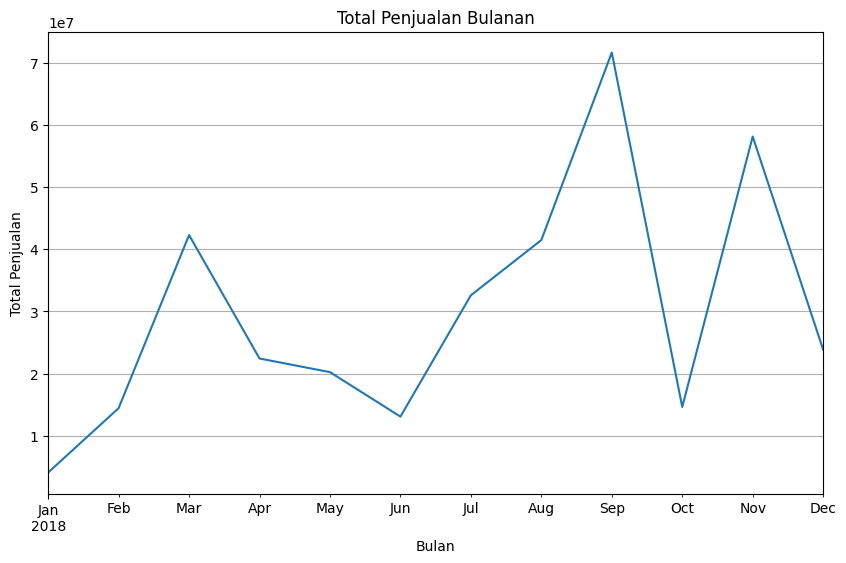

In [159]:
# Pastikan kolom Tgl_Invoice dalam format datetime
data_cleaned['Tgl_Invoice'] = pd.to_datetime(data_cleaned['Tgl_Invoice'], errors='coerce')

# Mengatur Tgl_Invoice sebagai indeks
data_cleaned = data_cleaned.set_index('Tgl_Invoice')

# Menampilkan data dengan indeks waktu
print(data_cleaned.head())

# Resampling data untuk penjualan bulanan
penjualan_bulanan = data_cleaned['Total'].resample('M').sum()

# Menampilkan hasil
print(penjualan_bulanan.head())

import matplotlib.pyplot as plt

# Visualisasi total penjualan bulanan
plt.figure(figsize=(10, 6))
penjualan_bulanan.plot()
plt.title("Total Penjualan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.grid()
plt.show()


Grafik diatas menunjukkan Total Penjualan Bulanan berdasarkan data Anda. Dimana dari hasil tersebut diperoleh:
- Penjualan bulanan terlihat berfluktuasi, dengan beberapa periode memiliki penjualan yang sangat tinggi dibandingkan yang lain.
- Bulan September memiliki total penjualan tertinggi, diikuti oleh November.
- Penurunan tajam terjadi setelah bulan September, kemungkinan menunjukkan pola musiman.

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Pastikan dataset telah dimuat
if 'data_cleaned' in locals():
    # ===========================================================
    # Langkah 1: Pilih Fitur untuk Clustering
    # ===========================================================
    # Memilih fitur yang relevan untuk clustering
    features = data_cleaned[['Jumlah', 'Harga', 'Total']]

    # ===========================================================
    # Langkah 2: Normalisasi Data
    # ===========================================================
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # ===========================================================
    # Langkah 3: Clustering dengan K-Means
    # ===========================================================
    # Membuat model K-Means dengan jumlah cluster tertentu, misalnya 3
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)

    # Menambahkan hasil clustering ke dataset asli
    data_cluster = data_cleaned.copy()
    data_cluster['Cluster'] = clusters

             No. Invoice  KodePelanggan    Nama Pelanggan              Alamat  \
Tgl_Invoice                                                                     
2018-05-01           256             23    Captain Marvel      Jl. Jambu mede   
2018-07-01           905             68         Captain N  Jl. Jambu semarang   
NaT                  492             76  Captain Universe     Jl. Jeruk besar   
2018-06-02           602             58           Aquaman          Jl. Bacang   
NaT                  158             41            Airboy          Jl. Binjai   

                   Kota   Provinsi    Sales      KanReg  Tgl_Kirim Ekspedisi  \
Tgl_Invoice                                                                    
2018-05-01    Mojokerto      Jatim    Mawar        Jawa 2018-06-01       JNE   
2018-07-01     Pasuruan      Jatim     Lily        Jawa 2018-08-01      TNT    
NaT          Singkawang     Kalbar    Mawar  Kalimantan        NaT       POS   
2018-06-02      Cilegon     Bant

In [165]:
from IPython.display import display, HTML
display(HTML(data_cluster.to_html(index=False))) # Menampilkan tabel yang lebih rapi dengan HTML

No. Invoice,KodePelanggan,Nama Pelanggan,Alamat,Kota,Provinsi,Sales,KanReg,Tgl_Kirim,Ekspedisi,Kategori Barang,Jenis Barang,Jumlah,Harga,Total,TW,Waktu_Pengiriman,Cluster
256,23,Captain Marvel,Jl. Jambu mede,Mojokerto,Jatim,Mawar,Jawa,2018-06-01,JNE,Perabot,Meja Makan,1,2211000.0,2211000.0,1,31.0,2
905,68,Captain N,Jl. Jambu semarang,Pasuruan,Jatim,Lily,Jawa,2018-08-01,TNT,Perabot,Kursi Makan,6,3951000.0,23706000.0,1,31.0,0
492,76,Captain Universe,Jl. Jeruk besar,Singkawang,Kalbar,Mawar,Kalimantan,NaT,POS,Gadget,HP Apple,1,4892000.0,4892000.0,1,NaN,1
602,58,Aquaman,Jl. Bacang,Cilegon,Banten,Jasmine,Jawa,2018-07-02,POS,Elektronik,Mesin Cuci,3,4358000.0,13074000.0,1,30.0,1
158,41,Airboy,Jl. Binjai,Gorontalo,Gorontalo,Melati,Sulawesi,NaT,TNT,Perabot,Kursi Makan,3,3756000.0,11268000.0,1,NaN,2
624,74,Astro Boy,Jl. Belimbing,Tangerang Selatan,Banten,Melati,Jawa,NaT,TNT,Perabot,Meja Tamu,5,4737000.0,23685000.0,1,NaN,1
588,23,Captain Video,Jl. Jeruk keprok,Banjarbaru,Kalsel,Melati,Kalimantan,NaT,JNE,Gadget,HP Oppo,4,4032000.0,16128000.0,1,NaN,1
513,6,Deathlok,Jl. Lai,Makassar,Sulsel,Lily,Sulawesi,NaT,TNT,Perabot,Meja Tamu,8,2627000.0,21016000.0,1,NaN,0
127,30,Airmale,Jl. Bisbul,Jakarta Barat,Jakarta,Jasmine,Jawa,NaT,POS,Perabot,Lampu Taman,2,2464000.0,4928000.0,1,NaN,2
520,17,Colossus,Jl. Kecapi,Batam,Kepri,Jasmine,Sumatera,NaT,TNT,Perabot,Meja Tamu,3,2921000.0,8763000.0,1,NaN,2


In [164]:
# Menyimpan dataset dengan hasil clustering ke dalam file Excel
if 'data_cluster' in locals():
    # Menyimpan ke file Excel
    data_cluster.to_excel("data_cluster.xlsx", index=False)
    print("Dataset dengan hasil clustering telah disimpan ke file 'data_cluster.xlsx'.")
else:
    print("Dataset hasil clustering belum tersedia. Pastikan Anda telah menjalankan proses clustering.")

Dataset dengan hasil clustering telah disimpan ke file 'data_cluster.xlsx'.


# **Kendala:**

Dataset yang digunakan pada kasus ini perlu banyak diperbaiki, diantaranya kesalahan yang dapat dilihat antara lain pada nilai *(value)* dari setiap transaksi biasanya tidak sesuai hal ini diakibatkan karena data ini masih kurang terstruktur dengan baik. Selain itu masih banyak data yang kosong pada data ini sehingga diperlukan metode untuk memperbaiki masalah tersebut.


**`Terimakasih [link text](https://)`**